# Example 1: Separation of a Binary Mixture


This example shows the distillation column for a mixture of Benzene (Light Key) and Toluene (Heavy Key).
The rectifying and stripping operating lines of the column are affected by 3 parameters -- the reflux ratio, and the concentrations of the distillate and bottoms streams leaving from the top and bottom of the column, respectively.

A simple Raoult's Law Model is used to produce the thermodynamic equilibrium data for this mixture.

The Reflux Ratio must be greater than a minimum value for a feasible separation.  This demo will show that if the Reflux Ration is too low, the rectifying and stripping operating lines will not intersect beneath the Equilibrium Curve.



In [3]:
## IMPORT NECESSARY LIBRARIES ##
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from distillation.DistillationBinary import DistillationModelBinary
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
import matplotlib.pyplot as plt


###### System Parameters using Raoult's Law

In [4]:
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

P_sys = 1.0325

# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(2, P_sys, ["Benzene", "Toluene"], [benzene_antoine, toluene_antoine])


In [5]:
# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.999, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0.001, max=0.499, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=-1, max=1, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')

def plot_distil_oplines_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 4.5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_strip_binary(axs[0][0], axs[1][0])
    distillation_model.plot_distil_rect_binary(axs[0][1], axs[1][1])
    distillation_model.plot_distil_binary(axs[0][2], axs[1][2])
    plt.subplots_adjust(wspace=0.25)
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.

def plot_distil_stripping_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed.
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    distillation_model.plot_distil_strip_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # This is essential for the plot to be displayed in the Output widget in Jupyter.

def plot_distil_rectifying_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModelBinary(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_rect_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.

out_strip = Output()
out_rect = Output()
out_oplines = Output()

### Demo 1: Stripping Line

##### The Stripping Operating Line (green line) is defined by the set values for Reflux Ratio and Bottoms Composition.  
##### An infinite number of stages are needed as the stripping line approaches the Equilibrium Curve (blue curve).  This results in a 'Fixed Point.'  The blue triangles on the x-axis show that despite infinitely many equilibrium stages, the concentration cannot move past this point.

##### This graph also includes dashed gray lines, depicting the McCabe-Thiele graphical method for calculating the equilibrium stage compositions.

#### Use the sliders to change the parameters and see how the Fixed Point responds.

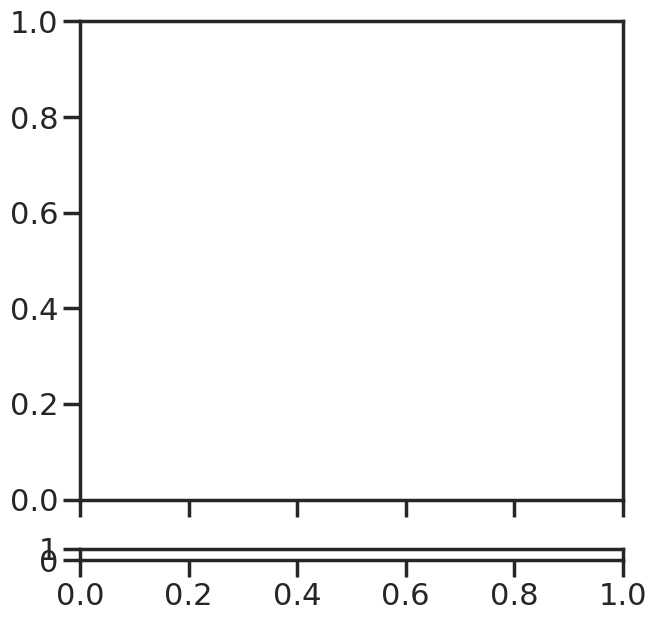

In [6]:
def on_go_button_click(b):
    with out_strip:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_stripping_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox([xB1_slider, R1_slider]), go_button, out_strip])
display(layout)



### Demo 2: Rectifying Line

##### The Rectifying Operating Line (green line) is defined by the set values for Reflux Ratio and Distillate Composition:
##### $y_{n+1} = [\frac{R}{R+1}]x_n + \frac{x_D}{R+1}$
##### An infinite number of stages are needed as the rectifying line approaches the Equilibrium Curve (blue curve). This results in a 'Fixed Point.' The blue circles on the x-axis show that despite infinitely many equilibrium stages, the concentration cannot move past this point.

##### This graph also includes dashed gray lines, depicting the McCabe-Thiele graphical method for calculating the equilibrium stage compositions.

#### Use the sliders to change the parameters and see how the Fixed Point responds.

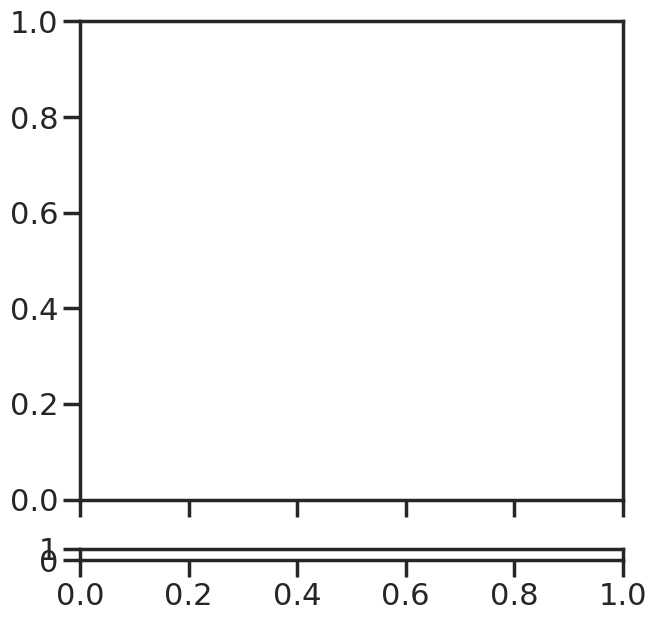

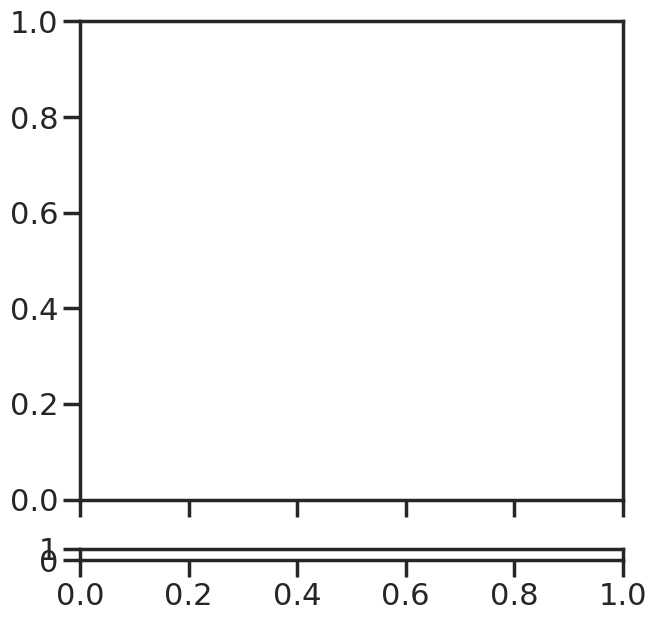

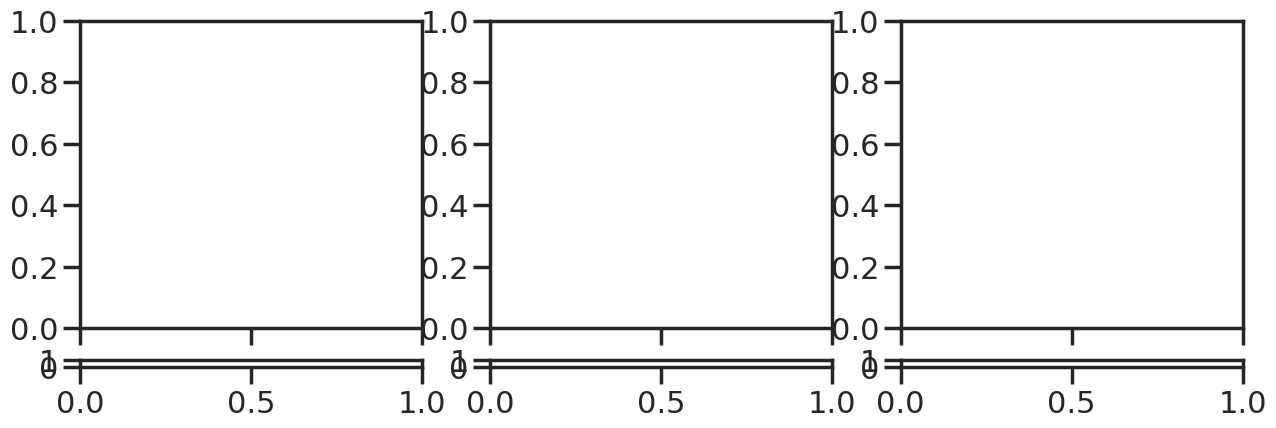

In [7]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex1, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([HBox([xD1_slider, R1_slider]), rect_button, out_rect])
display(layout)

### Demo 3: Full Column

##### This demonstration shows the previous graphs, as well as a third graph on the right for the entire distillation column.  The color of the operating lines shows changes based on the set parameters.  Green operating lines indicate a feasible column.  Red operating lines, however mean the column is not feasible.  If this is the case, look for the fixed points on the graph.  The x-axis below will also show that the triangles for the stripping section and circles for the rectifying section do not overlap.
#### Try changing the paramters to yield green operating lines.  Now look at the x-axis to see the overlap between rectifying and stripping sections.  How do the parameters affect the number of Equilibrium Stages?

###### Note that not all of the symbols on the x-axis correspond to real stage equilibria in the column.




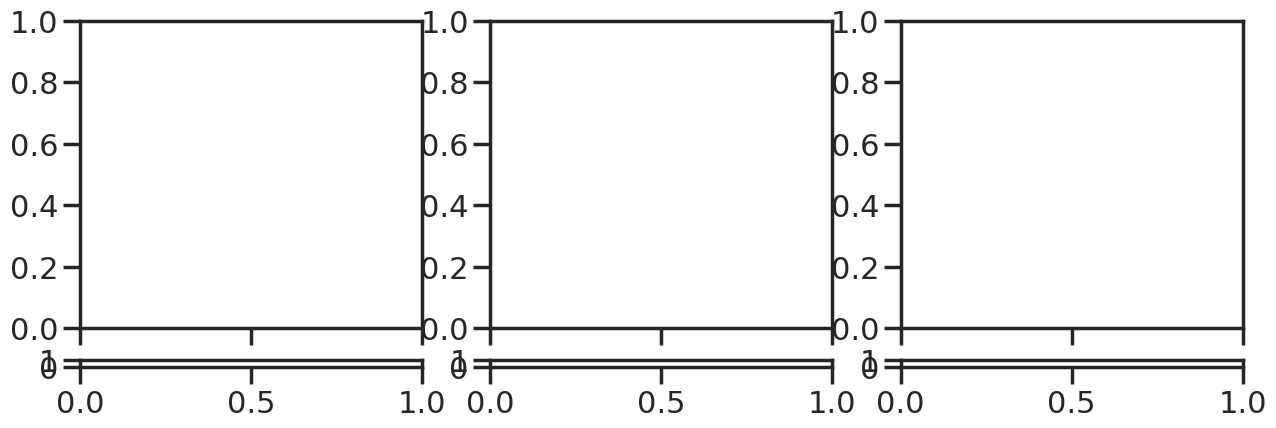

In [8]:
# Create your interactive widget but don't display it
oplines_plot = interactive(plot_distil_oplines_ex1, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_oplines_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_oplines_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

oplines_button = Button(description='Generate Plots')
oplines_button.on_click(on_oplines_button_click)

layout_oplines = VBox([HBox(oplines_plot.children[:-1]), oplines_button, out_oplines])
display(layout_oplines)
